[1] Draper, Thomas G. "Addition on a quantum computer." arXiv preprint quant-ph/0008033 (2000).

This technique uses the quantum Fourier transform and reduces the number of qubits necessary for addition by removing the need for temporary carry bits. This approach also allows the addition of a classical
number to a quantum superposition without encoding the classical number in the quantum register. This method also allows for massive parallelization in its execution.

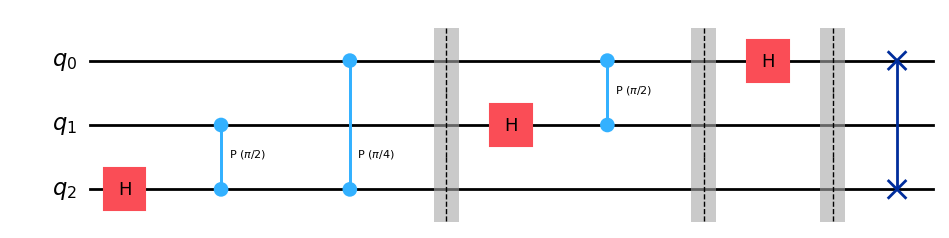

In [1]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# number of qubits
num = 3
do_swaps = True
qc = QFT(num, 0, True, False, True)
qc.decompose().draw('mpl')

In [2]:
# initalize a state with [1 0 0 ... 0]
init = []
for i in range(2**num):
    if i == 0:
        init.append(1)
    else:
        init.append(0)
v = Statevector(init)
v.draw("latex")


<IPython.core.display.Latex object>

In [3]:

vf = v.evolve(qc)
vf.draw("latex")



<IPython.core.display.Latex object>

See [1] T. G. Draper, “Addition on a quantum computer,” arXiv:quant-ph/0008033v1 (2000).

QFT Adder implementation in Qiskit


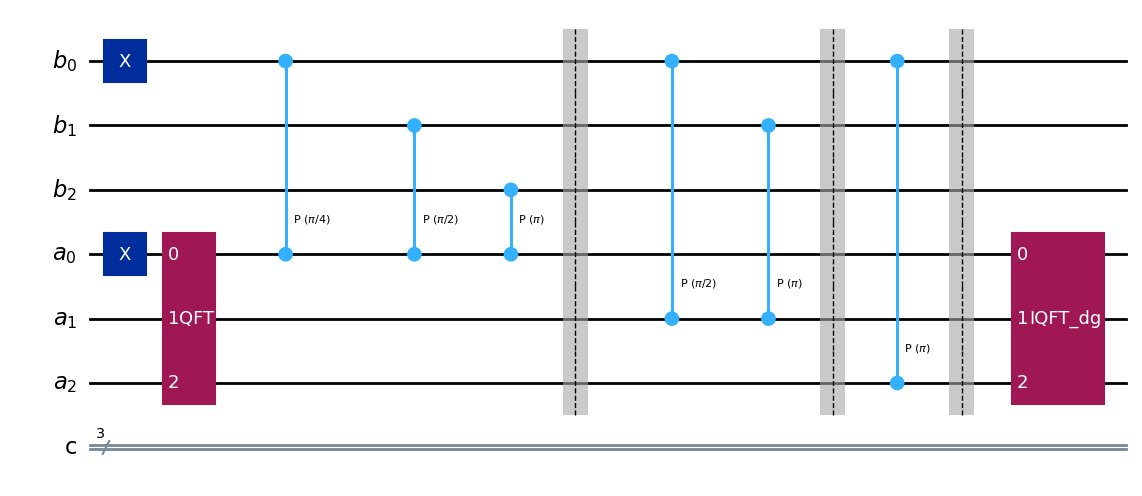

In [4]:
import numpy as np
# QFT adder

# Create the various registers needed
b = QuantumRegister(3, name='b')
a = QuantumRegister(3, name='a')
c = ClassicalRegister(3, name='c')



# Create an empty circuit with the specified registers
circuit = QuantumCircuit(b, a, c)

# b=001 (b_2 b_1 b_0)
# a=001 (a_2 a_1 a_0)
# we expect to find a+b=010

circuit.x(0)
circuit.x(3)

qc2 = QFT(3, 0, do_swaps=True, inverse=False)

qc3 = QFT(3, 0, do_swaps=True, inverse=True) 

circuit = circuit.compose(qc2, [3,4,5])



circuit.cp(np.pi/4, 0, 3)
circuit.cp(np.pi/2, 1, 3)
circuit.cp(np.pi, 2, 3)
circuit.barrier()
circuit.cp(np.pi/2, 0, 4)
circuit.cp(np.pi, 1, 4)


circuit.barrier()
circuit.cp( np.pi,0, 5)
circuit.barrier()
circuit = circuit.compose(qc3, [3,4,5])
circuit.draw('mpl')


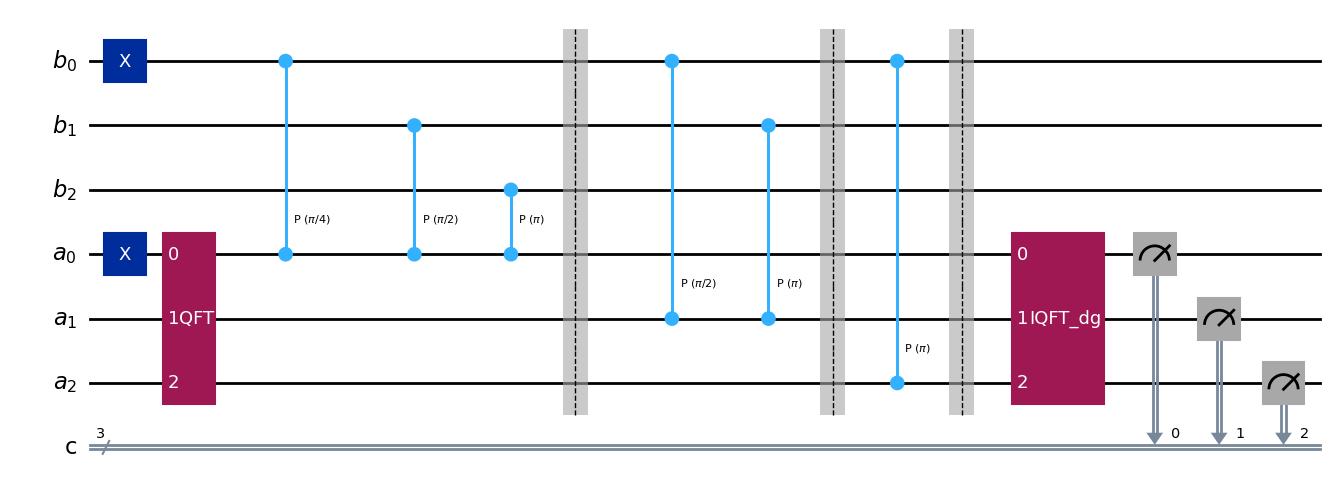

In [5]:

# map the quantum measurement to the classical bits
circuit.measure([3,4,5], [0,1,2])
circuit.draw('mpl')

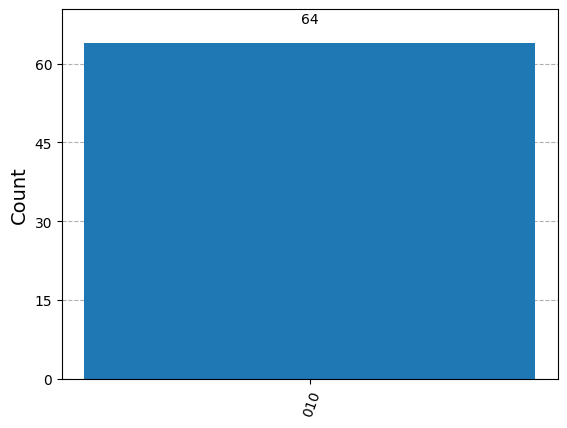

In [6]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

backend = AerSimulator()

# Circuit transpilation
qc_compiled = transpile(circuit, backend)

# Execute the circuit on the qasm simulator.
job_sim = backend.run(qc_compiled, shots=64)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)